In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('../DataSet/youtube/YoutubeCommentsDataSet.csv')

In [3]:
negative = data['Sentiment'].value_counts()
print(negative)

Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
data = data.dropna(subset=['Comment'])
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Comment'])

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(data['Sentiment'])

# 0 - negative
# 1 - neutral
# 2 - positive

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_dense = x.toarray()
x_train, x_test, y_train, y_test = train_test_split(x_dense,y, test_size=0.2,random_state=42)

model = SVC()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred, target_names= encoder.classes_))


In [ ]:
comments = []
with open('../Fetched_Data/comment.txt','r',encoding='utf-8') as file:
   for line in file:
      comments.append(line)

In [24]:
# with open('vectorizer.pkl','rb') as file:
#    vectorizer = pickle.load(file)

# with open('model.pkl','rb') as file:
#    model = pickle.load(file)

test = vectorizer.transform(comments)
pred = model.predict(test.toarray())
encoder.inverse_transform(pred)

array(['negative', 'negative', 'positive', 'negative', 'neutral',
       'negative', 'neutral', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'neutral',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'neutral', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'neutral', 'negative', 'negative',
       'neutral', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative'], dtype=object)

In [25]:
l = list(pred)
# 0 is for negative
# 1 is for neutral 
# 2 is for positive
neg = l.count(0)
neut = l.count(1)
pos = l.count(2)

print("Positive response are : ",pos)
print("Neutral response are : ",neut)
print("Negative response are : ",neg)

Positive response are :  17
Neutral response are :  7
Negative response are :  27


<BarContainer object of 3 artists>

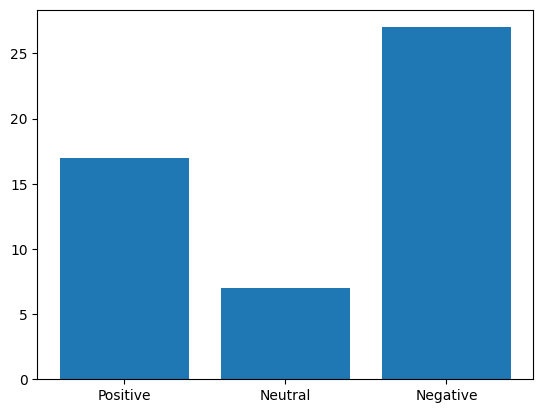

In [26]:
import matplotlib.pyplot as plt

plt.bar(['Positive','Neutral','Negative'],[pos,neut,neg])